In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Define constants
image_size = (128, 128)  # Adjust the size based on your dataset
batch_size = 16

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,w
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/bone-fracture-dataset/BoneFractureDataset/training',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/bone-fracture-dataset/BoneFractureDataset/testing',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [14]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Nadam, Adamax


# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(
    train_generator, 
    epochs=10,
    validation_data=test_generator
   )

Epoch 1/10
554/554 [==============================] - 64s 111ms/step - loss: 0.6590 - accuracy: 0.6043 - val_loss: 1.0694 - val_accuracy: 0.6400
Epoch 2/10
554/554 [==============================] - 45s 82ms/step - loss: 0.6562 - accuracy: 0.6922 - val_loss: 1.6999 - val_accuracy: 0.6183
Epoch 3/10
554/554 [==============================] - 53s 95ms/step - loss: 0.5184 - accuracy: 0.7720 - val_loss: 6.0359 - val_accuracy: 0.6633
Epoch 4/10
554/554 [==============================] - 74s 133ms/step - loss: 1.4139 - accuracy: 0.8326 - val_loss: 7.6074 - val_accuracy: 0.7833
Epoch 5/10
554/554 [==============================] - 71s 127ms/step - loss: 1.5893 - accuracy: 0.8589 - val_loss: 10.1006 - val_accuracy: 0.7383
Epoch 6/10
554/554 [==============================] - 77s 139ms/step - loss: 1.0053 - accuracy: 0.8838 - val_loss: 4.9345 - val_accuracy: 0.7817
Epoch 7/10
554/554 [==============================] - 61s 111ms/step - loss: 1.1144 - accuracy: 0.8918 - val_loss: 1.5231 - val_acc

In [65]:
# Evaluate the model
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

38/38 [==============================] - 1s 30ms/step - loss: 7.7157 - accuracy: 0.7950
Test Accuracy: 79.50%


In [17]:
# Make predictions on new data
predictions = model.predict(test_generator)

38/38 [==============================] - 3s 84ms/step


In [18]:
# Convert predictions to binary labels
predicted_labels = (predictions > 0.5).astype(int)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels
true_labels = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[196 164]
 [133 107]]


In [20]:
# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=['not_fractured', 'fractured'])
print("Classification Report:")
print(class_report)

Classification Report:
               precision    recall  f1-score   support

not_fractured       0.60      0.54      0.57       360
    fractured       0.39      0.45      0.42       240

     accuracy                           0.51       600
    macro avg       0.50      0.50      0.49       600
 weighted avg       0.52      0.51      0.51       600



In [24]:
model.save("my_model.h5")

1/1 [==============================] - 0s 79ms/step


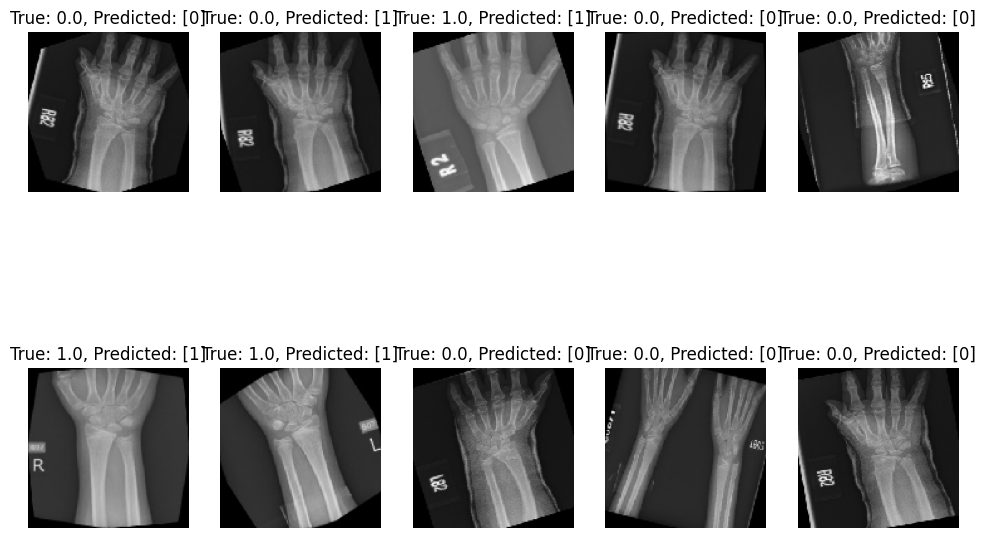

In [25]:
import matplotlib.pyplot as plt
import random

# Visualize random predictions
test_images, true_labels = next(test_generator)
predicted_labels = (model.predict(test_images) > 0.5).astype(int)

# Plot some sample images with true and predicted labels
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

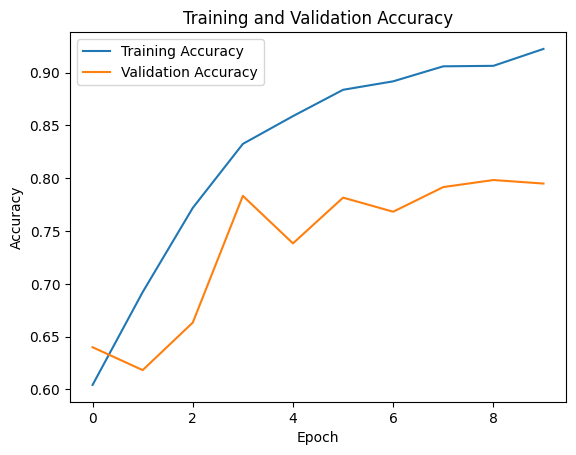

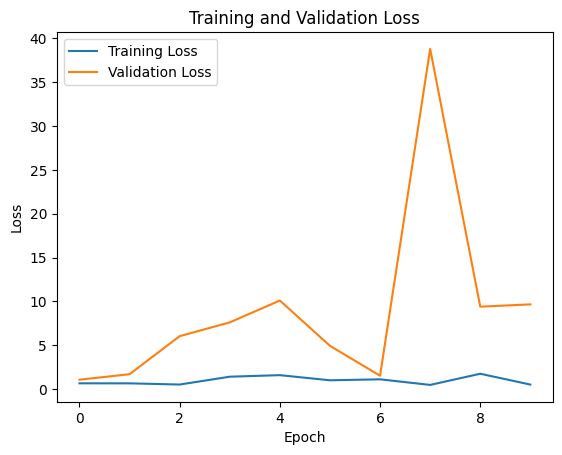

In [26]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Shallow Neural Network Baseline

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Get the image dimensions
image_shape = (128, 128, 3)
batch_size2 = 64

# Build a shallow neural network model
shallow_model = Sequential([
    Flatten(input_shape=image_shape),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train the shallow model
shallow_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Create a data generator for the training data
train_generator2 = train_datagen.flow_from_directory(
    '/kaggle/input/bone-fracture-dataset/BoneFractureDataset/training',
    target_size=image_size,
    batch_size=batch_size2,
    class_mode='binary'
)

# Train the shallow model
shallow_model.fit(train_generator2, epochs=5, validation_data=test_generator)

# Evaluate the shallow model
shallow_accuracy = shallow_model.evaluate(test_generator)[1]

# Get the predictions
y_pred = (shallow_model.predict(test_generator) > 0.5).astype(int)

# Get the true labels
y_test = test_generator.classes

# Calculate the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
shallow_report = classification_report(y_test, y_pred, target_names=['not_fractured', 'fractured'])
shallow_conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Shallow Neural Network Accuracy: {shallow_accuracy * 100:.2f}%")
print("Shallow Neural Network Classification Report:\n", shallow_report)
print("Shallow Neural Network Confusion Matrix:\n", shallow_conf_matrix)

Found 8863 images belonging to 2 classes.
Epoch 1/5
139/139 [==============================] - 43s 309ms/step - loss: 0.6644 - accuracy: 0.5903 - val_loss: 0.6740 - val_accuracy: 0.4967
Epoch 2/5
139/139 [==============================] - 43s 306ms/step - loss: 0.6350 - accuracy: 0.6144 - val_loss: 0.6754 - val_accuracy: 0.5317
Epoch 3/5
139/139 [==============================] - 44s 315ms/step - loss: 0.6206 - accuracy: 0.6410 - val_loss: 0.6671 - val_accuracy: 0.4367
Epoch 4/5
139/139 [==============================] - 43s 306ms/step - loss: 0.6058 - accuracy: 0.6603 - val_loss: 0.6657 - val_accuracy: 0.4967
Epoch 5/5
38/38 [==============================] - 1s 34ms/step
Shallow Neural Network Accuracy: 46.50%
Shallow Neural Network Classification Report:
                precision    recall  f1-score   support

not_fractured       0.59      0.23      0.33       360
    fractured       0.40      0.76      0.52       240

     accuracy                           0.44       600
    macro

# Trying transfer learning

# 1 -> VGG16

In [63]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

# Define constants
image_size = (128, 128)
batch_size = 32
train_generator3 = train_datagen.flow_from_directory(
    '/kaggle/input/bone-fracture-dataset/BoneFractureDataset/training',
    target_size=image_size,
    batch_size=32,
    class_mode='binary'
)
# Load pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Freeze the convolutional base
for layer in vgg_model.layers:
    layer.trainable = False

# Add custom classifier on top
custom_model = Sequential([
    vgg_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the custom model
custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the custom model
history = custom_model.fit(train_generator3, epochs=10, validation_data=test_generator)

# Evaluate the custom model
evaluation_VGG16 = custom_model.evaluate(test_generator)
print("Test Accuracy:", evaluation_VGG16[1])

# Make predictions on test data
predictions = custom_model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int)

# Get true labels
true_labels = test_generator.classes

# Generate confusion matrix
conf_matrix_VGG16 = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix_VGG16)

# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=['not_fractured', 'fractured'])
print("Classification Report:")
print(class_report)


Found 8863 images belonging to 2 classes.
Epoch 1/10
277/277 [==============================] - 46s 161ms/step - loss: 0.5716 - accuracy: 0.6947 - val_loss: 1.7491 - val_accuracy: 0.6117
Epoch 2/10
277/277 [==============================] - 45s 161ms/step - loss: 0.4218 - accuracy: 0.8032 - val_loss: 2.6907 - val_accuracy: 0.6583
Epoch 3/10
277/277 [==============================] - 45s 161ms/step - loss: 0.3549 - accuracy: 0.8374 - val_loss: 1.4962 - val_accuracy: 0.6883
Epoch 4/10
277/277 [==============================] - 45s 162ms/step - loss: 0.3093 - accuracy: 0.8644 - val_loss: 5.6073 - val_accuracy: 0.6850
Epoch 5/10
277/277 [==============================] - 45s 163ms/step - loss: 0.2905 - accuracy: 0.8742 - val_loss: 7.3405 - val_accuracy: 0.7133
Epoch 6/10
277/277 [==============================] - 45s 162ms/step - loss: 0.2767 - accuracy: 0.8754 - val_loss: 5.1206 - val_accuracy: 0.6900
Epoch 7/10
277/277 [==============================] - 44s 160ms/step - loss: 0.2496 - ac

# 2 -> DenseNet

In [55]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

# Define constants
image_size = (128, 128)
batch_size = 32

# Load pre-trained DenseNet121 model
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Freeze the convolutional base
for layer in densenet_model.layers:
    layer.trainable = False

# Add custom classifier on top
custom_model_densenet = Sequential([
    densenet_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the custom model
custom_model_densenet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the custom model
history_densenet = custom_model_densenet.fit(train_generator3, epochs=10, validation_data=test_generator)

# Evaluate the custom model
evaluation_densenet = custom_model_densenet.evaluate(test_generator)
print("Test Accuracy (DenseNet):", evaluation_densenet[1])

# Make predictions on test data
predictions_densenet = custom_model_densenet.predict(test_generator)
predicted_labels_densenet = (predictions_densenet > 0.5).astype(int)

# Get true labels
true_labels_densenet = test_generator.classes

# Generate confusion matrix
conf_matrix_densenet = confusion_matrix(true_labels_densenet, predicted_labels_densenet)
print("Confusion Matrix (DenseNet):")
print(conf_matrix_densenet)

# Generate classification report
class_report_densenet = classification_report(true_labels_densenet, predicted_labels_densenet, target_names=['not_fractured', 'fractured'])
print("Classification Report (DenseNet):")
print(class_report_densenet)


Epoch 1/10
277/277 [==============================] - 56s 171ms/step - loss: 0.7416 - accuracy: 0.6210 - val_loss: 0.5749 - val_accuracy: 0.6800
Epoch 2/10
277/277 [==============================] - 46s 167ms/step - loss: 0.5146 - accuracy: 0.7158 - val_loss: 0.5719 - val_accuracy: 0.6800
Epoch 3/10
277/277 [==============================] - 47s 168ms/step - loss: 0.4753 - accuracy: 0.7300 - val_loss: 0.5760 - val_accuracy: 0.7067
Epoch 4/10
277/277 [==============================] - 46s 165ms/step - loss: 0.4549 - accuracy: 0.7423 - val_loss: 0.5775 - val_accuracy: 0.7033
Epoch 5/10
277/277 [==============================] - 46s 165ms/step - loss: 0.4242 - accuracy: 0.7654 - val_loss: 0.5375 - val_accuracy: 0.7200
Epoch 6/10
277/277 [==============================] - 47s 169ms/step - loss: 0.4092 - accuracy: 0.7829 - val_loss: 0.5726 - val_accuracy: 0.7067
Epoch 7/10
277/277 [==============================] - 47s 169ms/step - loss: 0.4046 - accuracy: 0.7791 - val_loss: 0.5455 - val_ac

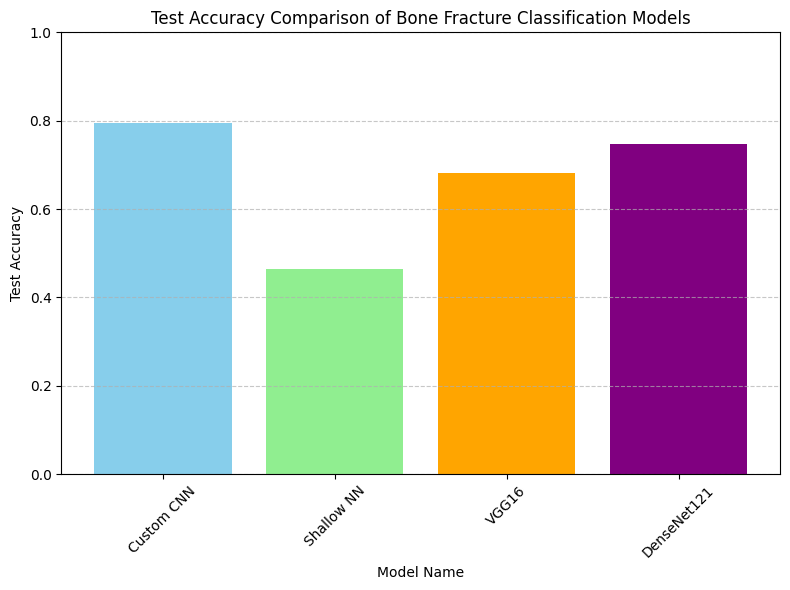

In [66]:
import matplotlib.pyplot as plt

# Model performance data (replace with actual values from your code)
model_names = ["Custom CNN", "Shallow NN", "VGG16", "DenseNet121"]
accuracies = [evaluation[1], shallow_accuracy,evaluation_VGG16[1] , evaluation_densenet[1]]  # Assuming evaluation stores test accuracy

# Accuracy bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'orange', 'purple'])
plt.xlabel("Model Name")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Comparison of Bone Fracture Classification Models")
plt.ylim(0.0, 1.0)  # Set y-axis limits for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()